In [92]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.optimize import curve_fit
from jupyterthemes import jtplot
jtplot.reset()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Output signal trend

***

## Arduino accuracy

In [93]:
err = 3.3 * 4 * 0.58 / 4096 #volt
err

0.0018691406249999997

## Input signal

In [94]:
Vin = 1.018 #volt
errVin = 0.019 #volt

Vin_th = 1 #volt

## Preamp output signal

In [95]:
Vpre = 0.3862829236546532 #volt
errVpre = err #volt

Vpre_th = 0.3878731202 #volt

## Shaper (ideal) output signal

In [96]:
Vsh_ideal = 0.34153256778309415 #volt
errVsh_ideal = err #volt

Vsh_ideal_th = 0.3673765 #volt

## Shaper (real - no Rpz) output signal

In [97]:
Vsh_norpz = 0.11445256778309399 #volt
errVsh_norpz = err #volt

Vsh_norpz_th = 0.14901910000000002 #volt

## Shaper (real - Rpz) output signal

In [98]:
Vsh_rpz = 0.131182567783094 #volt
errVsh_rpz = err #volt

Vsh_rpz_th = 0.1458615 #volt

## Chain output signal

In [99]:
Vchain = 1.2711323763955342 # volt
errVchain = err # volt

Vchain_th = Vsh_rpz_th * 9.254157483 #volt

## Output signal trend plot

### Arrange Data

In [100]:
d1 = {
    'Stage' : ['IN', 'Shaper'], 
    'Vmax' : [Vin, Vsh_ideal], 
    'Vmax th' : [Vin_th, Vsh_ideal_th]
}

d2 = {
    'Stage' : ['IN', 'PreAmp', 'Shaper'], 
    'Vmax' : [Vin, Vpre, Vsh_norpz], 
    'Vmax th' : [Vin_th, Vpre_th, Vsh_norpz_th]
}

d3 = {
    'Stage' : ['IN', 'PreAmp', 'Shaper', 'OUT'], 
    'Vmax' : [Vin, Vpre, Vsh_rpz, Vchain], 
    'Vmax th' : [Vin_th, Vpre_th, Vsh_rpz_th, Vchain_th]
}

data1 = pd.DataFrame(data=d1)
data2 = pd.DataFrame(data=d2)
data3 = pd.DataFrame(data=d3)

data11 = pd.Categorical(data1['Stage'], ordered = True, categories=['IN', 'Shaper'])
data22 = pd.Categorical(data2['Stage'], ordered = True, categories=['IN', 'PreAmp', 'Shaper'])
data33 = pd.Categorical(data3['Stage'], ordered = True, categories=['IN', 'PreAmp', 'Shaper', 'OUT'])

In [122]:
d = {
    'Stage' : ['IN', 'PreAmp','Shaper', 'IN', 'PreAmp', 'Shaper', 'IN', 'PreAmp', 'Shaper', 'OUT'],
    'Vmax' : [Vin, np.NaN, Vsh_ideal, Vin, Vpre, Vsh_norpz, Vin, Vpre, Vsh_rpz, Vchain],
    'Configuration' : ['Ideal', 'Ideal', 'Ideal', 'Real w/o Rpz', 'Real w/o Rpz', 'Real w/o Rpz', 'Real w/ Rpz', 'Real w/ Rpz', 'Real w/ Rpz', 'Real w/ Rpz']
}

data = pd.DataFrame(data=d)

Labels = ['IN', 'PreAmp', 'Shaper', 'OUT']

Palette = ['#02CB00', '#FF4B00', '#227FF7']

In [144]:
dd = {
    'Stage' : ['IN', 'PreAmp', 'Shaper', 'OUT', 'IN', 'PreAmp', 'Shaper', 'OUT'],
    'Vmax' : [Vin, Vpre, Vsh_rpz, Vchain, Vin_th, Vpre_th, Vsh_rpz_th, Vchain_th],
    'Config' : ['Experimental', 'Experimental', 'Experimental', 'Experimental', 'Theoretical', 'Theoretical', 'Theoretical', 'Theoretical']
}

ddata = pd.DataFrame(data=dd)
Labelss = ['IN', 'PreAmp', 'Shaper', 'OUT']
Palettee = ['#FF4B00', '#227FF7']

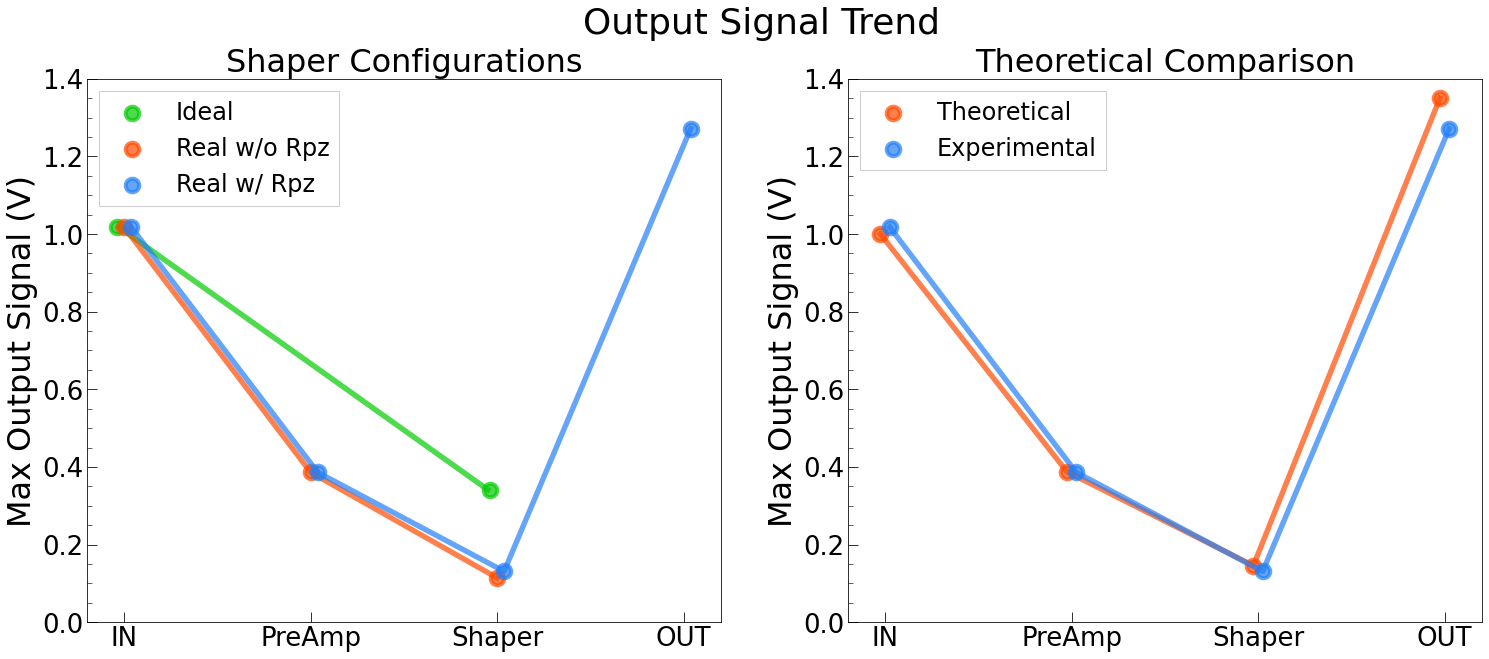

In [146]:
fig = plt.figure(figsize=(25,10))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

fig.suptitle('Output Signal Trend', fontsize = 36)



ax1.plot([-0.03, 1.95], [Vin, Vsh_ideal], color = '#02CB00', lw = 5.5, alpha = 0.7, zorder = 0)

g = sns.pointplot(x = 'Stage', y = 'Vmax', hue = 'Configuration', data = data, order = Labels, join=True, dodge = True, palette=Palette, scale = 2, plot_kws=dict(alpha=0.7), ax = ax1)

plt.setp(g.collections, alpha=.7) 
plt.setp(g.lines, alpha=.7)  


#plt.setp(ax1.get_legend().get_texts(), fontsize='24') 
#plt.setp(ax1.get_legend().get_title(), fontsize='32')


ax1.tick_params(axis = 'both', which = 'major', labelsize = 26, direction = 'in', length = 10)
ax1.tick_params(axis = 'y', which = 'minor', labelsize = 26, direction = 'in', length = 5)
ax1.tick_params(axis = 'x', which = 'minor', labelsize = 26, direction = 'in', length = 0)
ax1.set_yticks(ticks = ax1.get_yticks(), minor = True)
ax1.minorticks_on()

ax1.set_xlabel('', fontsize = 0, loc = 'center')
ax1.set_ylabel('Max Output Signal (V)', fontsize = 32, loc = 'center')

ax1.set_title('Shaper Configurations', fontsize = 32)

ax1.set_xlim(left = -0.2, right = 3.2)
ax1.set_ylim(bottom = 0, top = 1.4)

ax1.legend(loc = 'best', prop = {'size': 24}, ncol = 1, frameon = True, fancybox = False, framealpha = 1)


g1 = sns.pointplot(x = 'Stage', y = 'Vmax', hue = 'Config', data = ddata, order = Labelss, hue_order = ['Theoretical', 'Experimental'], join=True, dodge = True, palette=Palettee, scale = 2, plot_kws=dict(alpha=0.7), ax = ax2)

plt.setp(g1.collections, alpha=.7) 
plt.setp(g1.lines, alpha=.7)  

ax2.tick_params(axis = 'both', which = 'major', labelsize = 26, direction = 'in', length = 10)
ax2.tick_params(axis = 'y', which = 'minor', labelsize = 26, direction = 'in', length = 5)
ax2.tick_params(axis = 'x', which = 'minor', labelsize = 26, direction = 'in', length = 0)
ax2.set_yticks(ticks = ax1.get_yticks(), minor = True)
ax2.minorticks_on()

ax2.set_xlabel('', fontsize = 0, loc = 'center')
ax2.set_ylabel('Max Output Signal (V)', fontsize = 32, loc = 'center')

ax2.set_title('Theoretical Comparison', fontsize = 32)

ax2.set_xlim(left = -0.2, right = 3.2)
ax2.set_ylim(bottom = 0, top = 1.4)

ax2.legend(loc = 'best', prop = {'size': 24}, ncol = 1, frameon = True, fancybox = False, framealpha = 1)

#fig.savefig('../Plots/Catena/trend3.png', dpi = 300, facecolor='white')

plt.show()

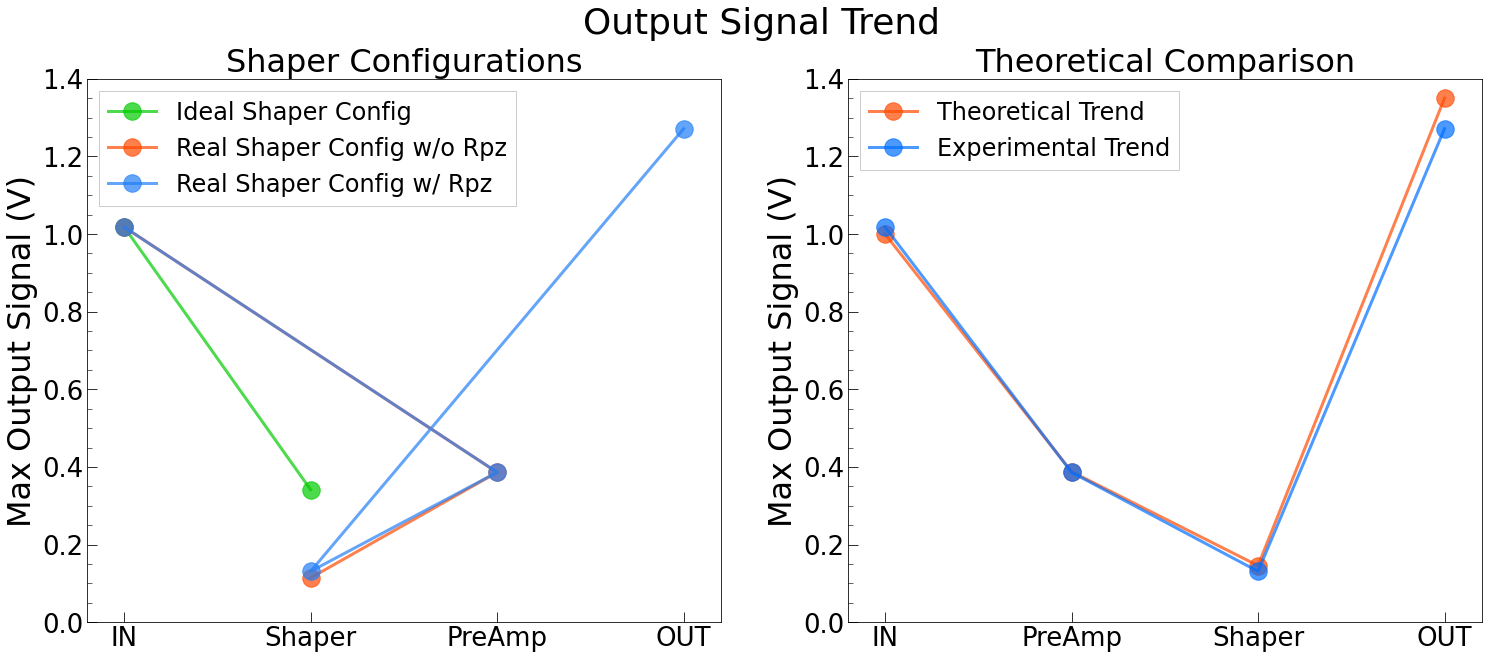

In [104]:
fig = plt.figure(figsize=(25,10))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

fig.suptitle('Output Signal Trend', fontsize = 36)

ax1.plot(data1['Stage'], data1['Vmax'], color = '#02CB00', linewidth = 3, marker = '.', markersize = 35, alpha = 0.7, label = 'Ideal Shaper Config')
ax1.plot(data2['Stage'], data2['Vmax'], color = '#FF4B00', linewidth = 3, marker = '.', markersize = 35, alpha = 0.7, label = 'Real Shaper Config w/o Rpz')
ax1.plot(data3['Stage'], data3['Vmax'], color = '#227FF7', linewidth = 3, marker = '.', markersize = 35, alpha = 0.7, label = 'Real Shaper Config w/ Rpz')

ax1.tick_params(axis = 'both', which = 'major', labelsize = 26, direction = 'in', length = 10)
ax1.tick_params(axis = 'y', which = 'minor', labelsize = 26, direction = 'in', length = 5)
ax1.tick_params(axis = 'x', which = 'minor', labelsize = 26, direction = 'in', length = 0)
ax1.set_yticks(ticks = ax1.get_yticks(), minor = True)
ax1.minorticks_on()

#ax1.set_xlabel('Stage', fontsize = 32, loc = 'center')
ax1.set_ylabel('Max Output Signal (V)', fontsize = 32, loc = 'center')

ax1.set_title('Shaper Configurations', fontsize = 32)

ax1.set_xlim(left = -0.2, right = 3.2)
ax1.set_ylim(bottom = 0, top = 1.4)

ax1.legend(loc = 'best', prop = {'size': 24}, ncol = 1, frameon = True, fancybox = False, framealpha = 1)



ax2.plot(data3['Stage'], data3['Vmax th'], color = '#FF4B00', linewidth = 3, marker = '.', markersize = 35, alpha = 0.7, label = 'Theoretical Trend')
ax2.plot(data3['Stage'], data3['Vmax'], color = '#006FFF', linewidth = 3, marker = '.', markersize = 35, alpha = 0.7, label = 'Experimental Trend')

ax2.tick_params(axis = 'both', which = 'major', labelsize = 26, direction = 'in', length = 10)
ax2.tick_params(axis = 'y', which = 'minor', labelsize = 26, direction = 'in', length = 5)
ax2.tick_params(axis = 'x', which = 'minor', labelsize = 26, direction = 'in', length = 0)
ax2.set_yticks(ticks = ax1.get_yticks(), minor = True)
ax2.minorticks_on()

#ax2.set_xlabel('Stage', fontsize = 32, loc = 'center')
ax2.set_ylabel('Max Output Signal (V)', fontsize = 32, loc = 'center')

ax2.set_title('Theoretical Comparison', fontsize = 32)

ax2.set_xlim(left = -0.2, right = 3.2)
ax2.set_ylim(bottom = 0, top = 1.4)

ax2.legend(loc = 'best', prop = {'size': 24}, ncol = 1, frameon = True, fancybox = False, framealpha = 1)


#fig.savefig('../Plots/Catena/trend2.png', dpi = 300, facecolor='white')
 
plt.show()